1.โหลด csv เข้าไปใน Python Pandas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', header=0)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


2.เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [66]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [67]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [68]:
df.sample(10)

,Review,Liked
128,I wouldn't return.,0
382,The service was outshining & I definitely reco...,1
130,This place is way too overpriced for mediocre ...,0
194,I'm not really sure how Joey's was voted best ...,0
629,The staff is always super friendly and helpful...,1
293,I live in the neighborhood so I am disappointe...,0
366,My wife had the Lobster Bisque soup which was ...,0
302,The potato chip order was sad... I could proba...,0
185,I ordered the Lemon raspberry ice cocktail whi...,1
786,We will not be coming back.,0


3.ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [70]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


4.สร้าง countplot ของ Liked

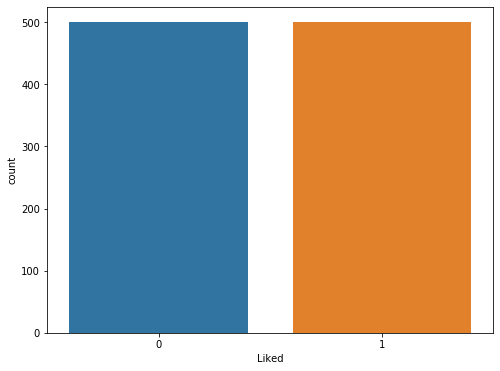

In [71]:
plt.figure(figsize = (8,6))
sns.countplot(x="Liked", data=df)

5.หาความยาวของ Review ในแต่ละแถวแล้วเพิ่มเป็นคอลัมน์ใหม่

In [72]:
df['len'] = df['Review'].str.len()

In [73]:
df

,Review,Liked,len
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


6.หา histogram ของความยาวของ text ทั้งหมด

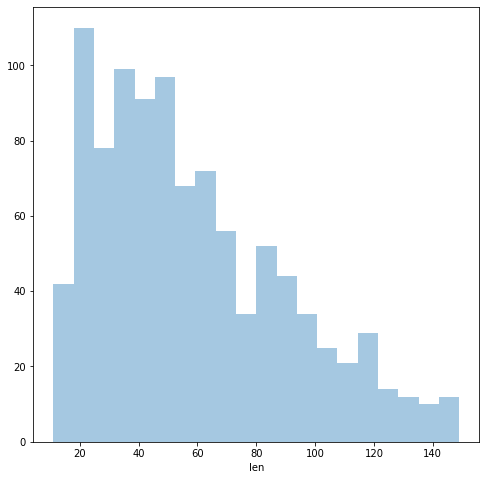

In [74]:
fig = plt.figure(figsize=[8,8])
sns.distplot(df['len'],bins=20, kde=False)

7.หา histogram ของความยาวของ text แบ่งตาม Liked

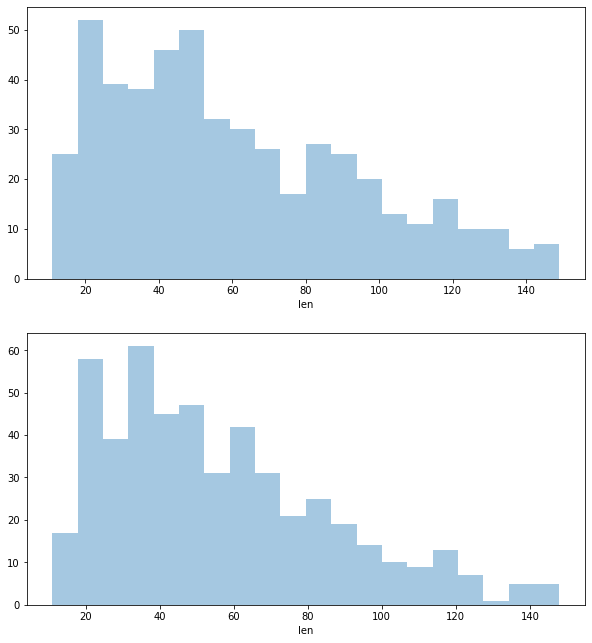

In [75]:
df_1 = df[df['Liked'] == 0]
df_2 = df[df['Liked'] == 1]

fig = plt.figure(figsize=[10,11])

sup1 = fig.add_subplot(211)
sns.distplot(df_1['len'],bins=20, kde=False)

sup2 = fig.add_subplot(212)
sns.distplot(df_2['len'],bins=20, kde=False)

8.แสดงรีวิวเต็มของรีวิวที่ยาวที่สุด

In [76]:
df.sort_values(by=['len'])

,Review,Liked,len
479,I LOVED it!,1,11
648,Great food.,1,11
663,Both great!,1,11
581,Over rated.,0,11
165,DELICIOUS!!,1,11
...,...,...,...
862,"Hot dishes are not hot, cold dishes are close ...",0,147
395,"To summarize... the food was incredible, nay, ...",1,147
42,Hard to judge whether these sides were good be...,0,147
549,My boyfriend and I came here for the first tim...,1,148


In [78]:
pd.options.display.max_colwidth = 150

In [81]:
df['Review'][985]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

9.หาความยาวของ Review เฉลี่ยต่อชนิดของ Liked

In [83]:
df_1['len'].mean()

60.75

In [84]:
df_2['len'].mean()

55.88

10.ปริ้น Review 10 อันแรกที่คนชอบ และ ปริ้น Review 10 อันแรกที่คนไม่ชอบ โดยใช้ For Loop

In [104]:
lst = []
for x in df_1['Review']:
    lst.append(x)
    if len(lst) == 10:
        break
print(*lst, sep = "\n")

Crust is not good.
Not tasty and the texture was just nasty.
Now I am getting angry and I want my damn pho.
Honeslty it didn't taste THAT fresh.)
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
Would not go back.
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
I was disgusted because I was pretty sure that was human hair.
I was shocked because no signs indicate cash only.
Waitress was a little slow in service.


In [105]:
lst_2 = []
for x in df_2['Review']:
    lst_2.append(x)
    if len(lst_2) == 10:
        break
print(*lst_2, sep = "\n")

Wow... Loved this place.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
The fries were great too.
A great touch.
Service was very prompt.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
Highly recommended.
The food, amazing.
Service is also cute.


11.เขียนฟังก์ชั่นรวมที่ ลบ punctuation และ ลบ stopwords

In [107]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
def text_process(mess):
    no_punc = ([x for x in mess if x not in string.punctuation])
    no_punc = ''.join(no_punc)
    text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return text

In [110]:
df['Review'].head(5).apply(text_process)

0                                                        [Wow, Loved, place]
1                                                              [Crust, good]
2                                                    [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Steve, recommendation, loved]
4                                           [selection, menu, great, prices]
Name: Review, dtype: object

12.ทำ Bag-Of-Words โดยใช้ Analyzer เป็น ฟังก์ชั่นที่ลบ punctuation และ ลบ stopwords

In [111]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Review'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000256D541EC18>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [114]:
bow_df = bow_transformer.transform(df['Review'])
bow_df

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [123]:
print(bow_df[5])

  (0, 480)	1
  (0, 792)	1
  (0, 1061)	1
  (0, 1528)	1
  (0, 2074)	1


13.มี Vocabulary กี่คำใน Corpus หลังจากทำ BOW

In [116]:
len(bow_transformer.vocabulary_)

2159

14.ขนาดของ Sparse Matrix เป็นเท่าใดหลังจากทำ BOW

In [115]:
bow_df.nnz

5606

15.หา % ของ Sparsity

In [117]:
print('% Sparsity ',bow_df.nnz*100/(bow_df.shape[0]*bow_df.shape[1]))

% Sparsity  0.25965724872626217


16.ทำ TF-IDF

In [118]:
tfidf_transformer = TfidfTransformer().fit(bow_df)

In [119]:
tfidf_text = tfidf_transformer.transform(bow_df)

In [121]:
print(tfidf_text[5])

  (0, 2074)	0.3713478817259632
  (0, 1528)	0.47990079360206317
  (0, 1061)	0.40248319038496705
  (0, 792)	0.45962825817944863
  (0, 480)	0.508473327499304


17.สร้าง Classifier ด้วย MultinomialNB

In [132]:
#It should be used for the features with discrete values like word count 1,2,3...
multinb = MultinomialNB()

In [125]:
x = tfidf_text

In [126]:
y = df['Liked']

In [133]:
liked_detection = multinb.fit(x,y)

18.ทำนายผล และสร้าง Confusion Matrix

In [134]:
predict = liked_detection.predict(x)

In [135]:
confusion_matrix(y,predict)

array([[486,  14],
       [ 21, 479]], dtype=int64)

19.ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [136]:
print('Accuracy = ',accuracy_score(y,predict))
print('f1 =',f1_score(y,predict))
print('precision =',precision_score(y,predict))
print('recall =',recall_score(y,predict))

Accuracy =  0.965
f1 = 0.9647532729103725
precision = 0.9716024340770791
recall = 0.958


20.สร้าง Classifier ด้วย GaussianNB

In [139]:
from sklearn.naive_bayes import GaussianNB
#It should be used for features in decimal form. GNB assumes features to follow a normal distribution.
gausnb = GaussianNB()

In [141]:
liked_detection_gauss = gausnb.fit(x.toarray(),y)

21.ทำนายผล และสร้าง Confusion Matrix

In [143]:
predict_gauss = liked_detection_gauss.predict(x.toarray())

22.ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [144]:
confusion_matrix(y,predict_gauss)

array([[456,  44],
       [  0, 500]], dtype=int64)

In [145]:
print('Accuracy = ',accuracy_score(y,predict_gauss))
print('f1 =',f1_score(y,predict_gauss))
print('precision =',precision_score(y,predict_gauss))
print('recall =',recall_score(y,predict_gauss))

Accuracy =  0.956
f1 = 0.9578544061302682
precision = 0.9191176470588235
recall = 1.0


23.Split data ด้วยอัตราส่วน 0.2

In [146]:
x = df['Review']
y = df['Liked']

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

24.สร้าง Data Pipeline

In [152]:
pl = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
               ('tfidf',TfidfTransformer()),
               ('classifier',MultinomialNB())
])

In [153]:
pl.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000256D541EC18>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

25.ทำนายผล และสร้าง Confusion Matrix

In [154]:
pl_predict = pl.predict(x_test)

In [155]:
confusion_matrix(y_test,pl_predict)

array([[72, 22],
       [23, 83]], dtype=int64)

26.ทดสอบวัดผลด้วย Testing Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [156]:
print('Accuracy = ',accuracy_score(y_test,pl_predict))
print('f1 =',f1_score(y_test,pl_predict))
print('precision =',precision_score(y_test,pl_predict))
print('recall =',recall_score(y_test,pl_predict))

Accuracy =  0.775
f1 = 0.7867298578199052
precision = 0.7904761904761904
recall = 0.7830188679245284
